# Comparação entre as fases do covid nas capitais de cada estado com o aumento/decréscimo da mobilidade

## São Paulo:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from statsmodels.formula.api import ols

sns.set_theme(style="darkgrid")
plt.style.use('bmh')
%matplotlib inline

In [5]:
df_mobility = pd.read_csv('../dataframes/mobility-rep.csv.gz')
df_mobility['date'] = pd.to_datetime(df_mobility['date'])

In [6]:
df_mobility.head()

country_region_code country_region sub_region_1 sub_region_2  metro_area  \
0                  BR         Brazil          NaN          NaN         NaN   
1                  BR         Brazil          NaN          NaN         NaN   
2                  BR         Brazil          NaN          NaN         NaN   
3                  BR         Brazil          NaN          NaN         NaN   
4                  BR         Brazil          NaN          NaN         NaN   

  iso_3166_2_code  census_fips_code       date  \
0             NaN               NaN 2020-02-15   
1             NaN               NaN 2020-02-16   
2             NaN               NaN 2020-02-17   
3             NaN               NaN 2020-02-18   
4             NaN               NaN 2020-02-19   

   retail_and_recreation_percent_change_from_baseline  \
0                                                5.0    
1                                                2.0    
2                                               -2.0    
3                                               -3.0    
4                                               -1.0    

   grocery_and_pharmacy_percent_change_from_baseline  \
0                                                4.0   
1                                                3.0   
2                                                0.0   
3                                               -1.0   
4                                               -2.0   

   parks_percent_change_from_baseline  \
0                                -5.0   
1                               -13.0   
2                               -12.0   
3                               -11.0   
4                                -5.0   

   transit_stations_percent_change_from_baseline  \
0                                            8.0   
1                                            3.0   
2                                            9.0   
3                                            9.0   
4                                            8.0   

   workplaces_percent_change_from_baseline  \
0                                      6.0   
1                                      0.0   
2                                     19.0   
3                                     15.0   
4                                     14.0   

   residential_percent_change_from_baseline  
0                                       0.0  
1                                       1.0  
2                                      -1.0  
3                                      -1.0  
4                                      -1.0

### Em São Paulo, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos é alta e os picos e vales seguem um padrão similar durante a quarentena. Pode-se notar que como São Paulo é a maior metrópole do Brasil, justifica termos valores de picos mais acentuados/altos que de outras capitais.

In [7]:
df_sp = df_mobility.copy()
df_sp = df_sp[df_sp["sub_region_1"] == "State of São Paulo"]
df_sp = df_sp[df_sp["sub_region_2"] == "São Paulo"]

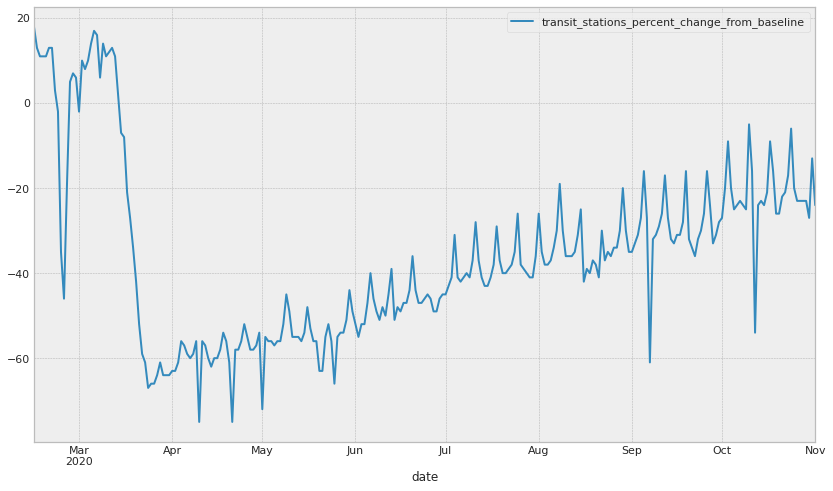

In [8]:
ax = df_sp[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [9]:
df_sp[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                        1.00000   
workplaces_percent_change_from_baseline                                              0.88842   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                  0.88842  
workplaces_percent_change_from_baseline                                        1.00000

In [10]:
df_sp['transit_stations_percent_change_from_baseline'].var()

432.22080754494544

### No Rio de Janeiro, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos é alta. Os picos e vales seguem um padrão similar entre os dois gráficos durante a quarentena, porém em alguns pontos existem pequenas diferenças de comportamento. 

In [11]:
df_rio = df_mobility.copy()
df_rio = df_rio[df_rio["sub_region_1"] == "State of Rio de Janeiro"]
df_rio = df_rio[df_rio["sub_region_2"] == "Rio de Janeiro"]

<AxesSubplot:xlabel='date'>

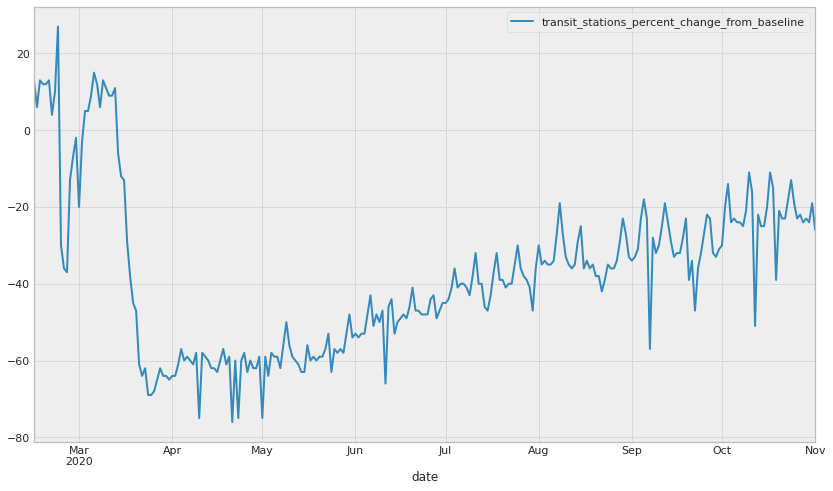

In [12]:
df_rio[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [13]:
df_rio[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                       1.000000   
workplaces_percent_change_from_baseline                                             0.887245   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                 0.887245  
workplaces_percent_change_from_baseline                                       1.000000

In [14]:
df_rio['transit_stations_percent_change_from_baseline'].var()

437.5657235484821

### Em Fortaleza, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos é consideravelmente mais baixa que São Paulo e o Rio de Janeiro. O comportamento entre os dois gráficos durante a quarentena não parece similar como as capitais anteriores. Pode-se perceber que os picos da mobilidade em ambientes de trabalho não acompanham as mudanças da mobilidade em transportes públicos. Fatores como a menor disponibilidade ou o menor acesso da população a transportes públicos pode ter relação com esses dados.

In [15]:
df_ceara = df_mobility.copy()
df_ceara = df_ceara[df_ceara["sub_region_1"] == "State of Ceará"]
df_ceara = df_ceara[df_ceara["sub_region_2"] == "Fortaleza"]

<AxesSubplot:xlabel='date'>

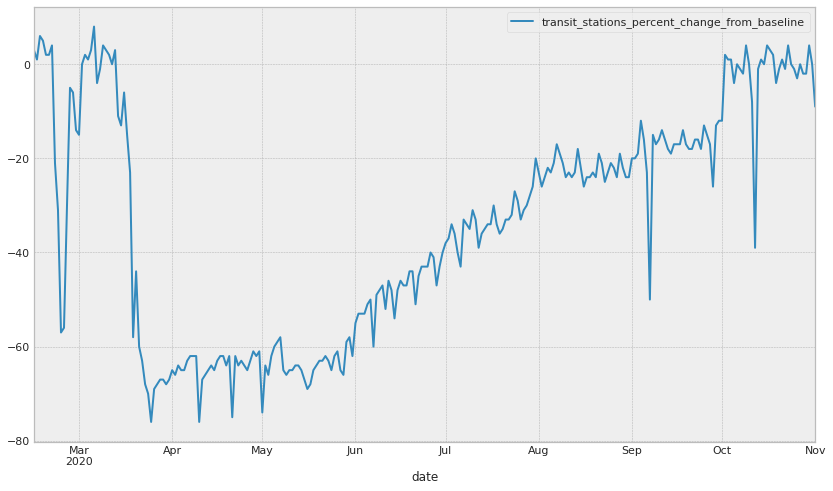

In [16]:
df_ceara[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [17]:
df_ceara[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                       1.000000   
workplaces_percent_change_from_baseline                                             0.881939   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                 0.881939  
workplaces_percent_change_from_baseline                                       1.000000

In [18]:
df_ceara['transit_stations_percent_change_from_baseline'].var()

596.0559976422045

### Em Manaus, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos é bem alta. Algo pertinente a se observar é o final do gráfico, que exibe um salto do acesso a transportes públicos em relação a baseline. Esse salto (em relação à baseline) pode indicar que provavelmente o acesso a transportes públicos teve outros motivos além do trabalho.

In [19]:
df_ama = df_mobility.copy()
df_ama = df_ama[df_ama["sub_region_1"] == "State of Amazonas"]
df_ama = df_ama[df_ama["sub_region_2"] == "Manaus"]

<AxesSubplot:xlabel='date'>

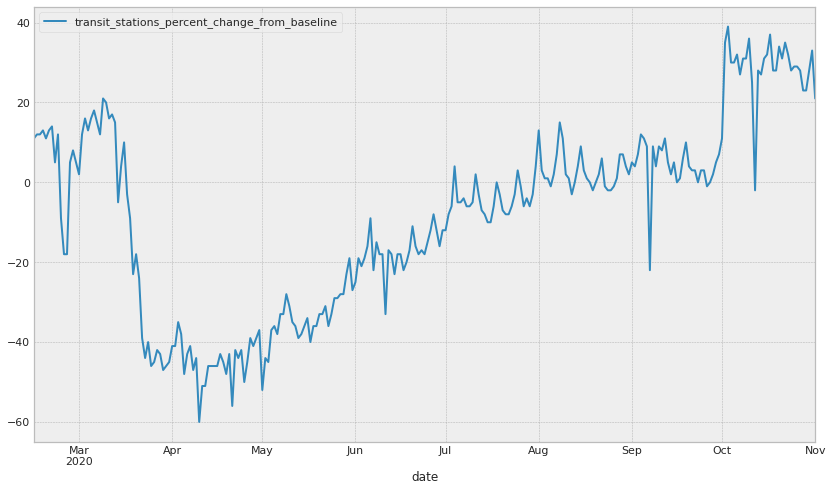

In [20]:
df_ama[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [21]:
df_ama[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                       1.000000   
workplaces_percent_change_from_baseline                                             0.890219   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                 0.890219  
workplaces_percent_change_from_baseline                                       1.000000

In [22]:
df_ama['transit_stations_percent_change_from_baseline'].var()

564.7869437076333

### Obtendo o gráfico de mobilidade em Manaus:

<AxesSubplot:xlabel='date'>

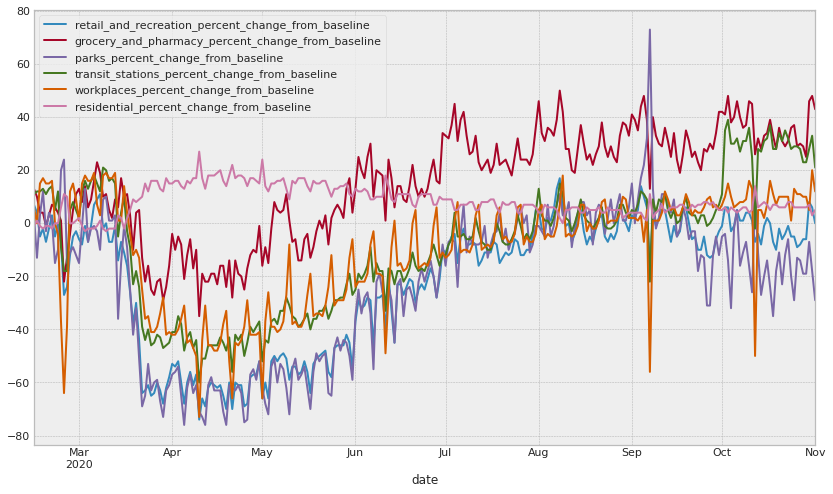

In [23]:
df_ama[['retail_and_recreation_percent_change_from_baseline',
             'grocery_and_pharmacy_percent_change_from_baseline',
             'parks_percent_change_from_baseline',
             'transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline',
             'residential_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

### Em Curitiba, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos é mais baixa que São Paulo, Manaus e Rio de Janeiro, porém ainda é maior que em Fortaleza.

In [24]:
df_parana = df_mobility.copy()
df_parana = df_parana[df_parana["sub_region_1"] == "State of Paraná"]
df_parana = df_parana[df_parana["sub_region_2"] == "Curitiba"]

<AxesSubplot:xlabel='date'>

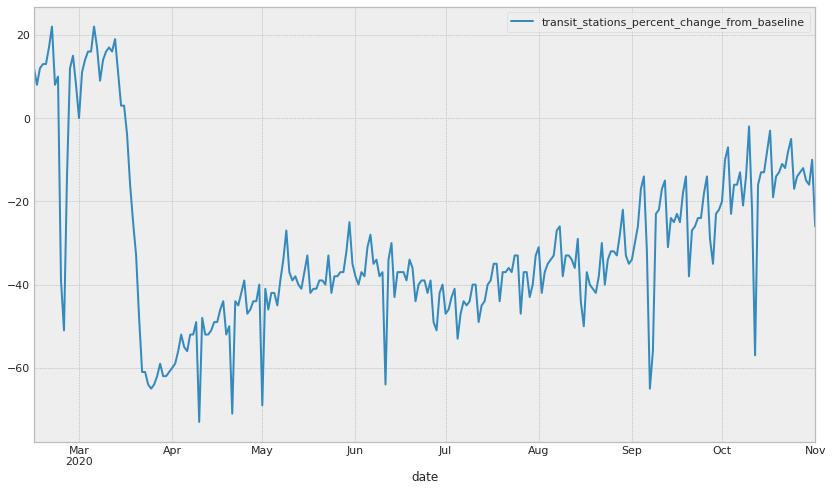

In [25]:
df_parana[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [26]:
df_parana[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                        1.00000   
workplaces_percent_change_from_baseline                                              0.85958   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                  0.85958  
workplaces_percent_change_from_baseline                                        1.00000

In [27]:
df_parana['transit_stations_percent_change_from_baseline'].var()

410.1423813734159

### Em BH, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos é a mais baixa entre os outros gráficos. BH apresenta a menor variância na mobilidade em transportes públicos em relação às outras capitais.

In [28]:
df_mg = df_mobility.copy()
df_mg = df_mg[df_mg["sub_region_1"] == "State of Minas Gerais"]
df_mg = df_mg[df_mg["sub_region_2"] == "Belo Horizonte"]

<AxesSubplot:xlabel='date'>

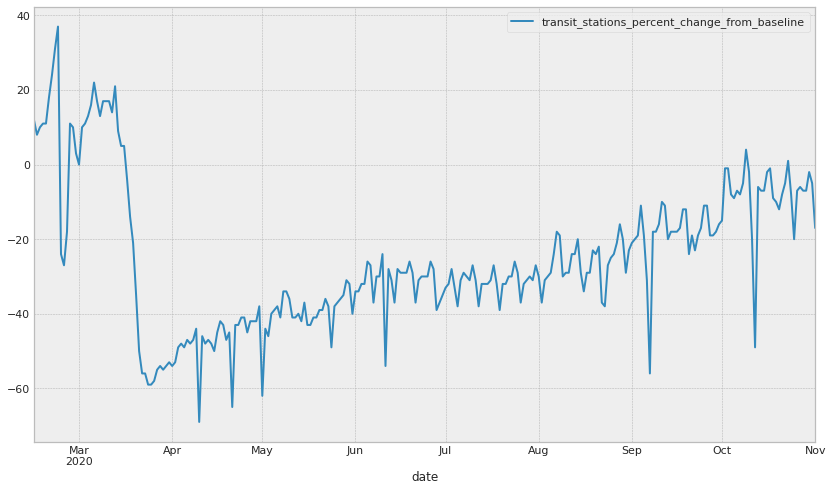

In [29]:
df_mg[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [30]:
df_mg[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                        1.00000   
workplaces_percent_change_from_baseline                                              0.77884   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                  0.77884  
workplaces_percent_change_from_baseline                                        1.00000

In [31]:
df_mg['transit_stations_percent_change_from_baseline'].var()

378.74244031830244

### Em Porto Alegre, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos é quase tão baixa quanto BH em relação às outras capitais. O gráfico da mobilidade em transportes públicos possui um comportamento um tanto quanto diferente aos outros já apresentados.

In [32]:
df_rs = df_mobility.copy()
df_rs = df_rs[df_rs["sub_region_1"] == "State of Rio Grande do Sul"]
df_rs = df_rs[df_rs["sub_region_2"] == "Porto Alegre"]

<AxesSubplot:xlabel='date'>

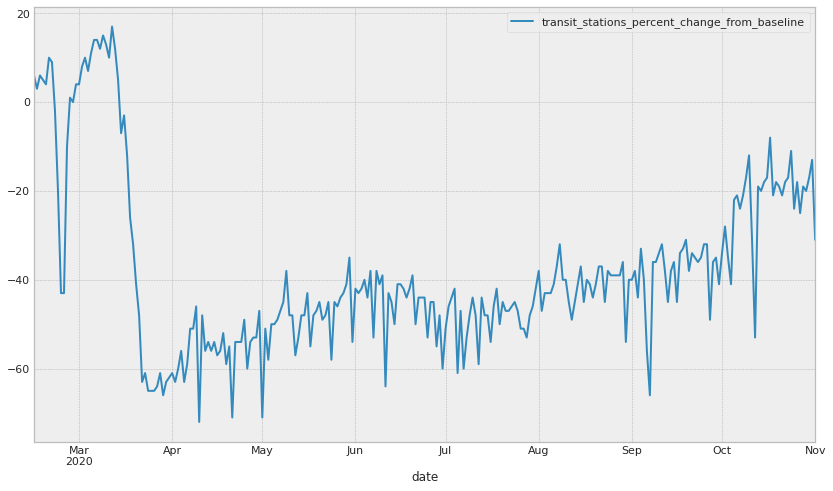

In [33]:
df_rs[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [34]:
df_rs[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                        1.00000   
workplaces_percent_change_from_baseline                                              0.79562   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                  0.79562  
workplaces_percent_change_from_baseline                                        1.00000

In [35]:
df_rs['transit_stations_percent_change_from_baseline'].var()

383.1114058355437

### Em Salvador, a correlação entre o aumento/diminuição da mobilidade em ambientes de trabalho e o acesso a transportes públicos se aproxima da observada em curitiba. O gráfico da mobilidade em transportes públicos não apresenta picos similares ao da mobilidade em ambientes de trabalho.

In [36]:
df_ba = df_mobility.copy()
df_ba = df_ba[df_ba["sub_region_1"] == "State of Bahia"]
df_ba = df_ba[df_ba["sub_region_2"] == "Salvador"]

<AxesSubplot:xlabel='date'>

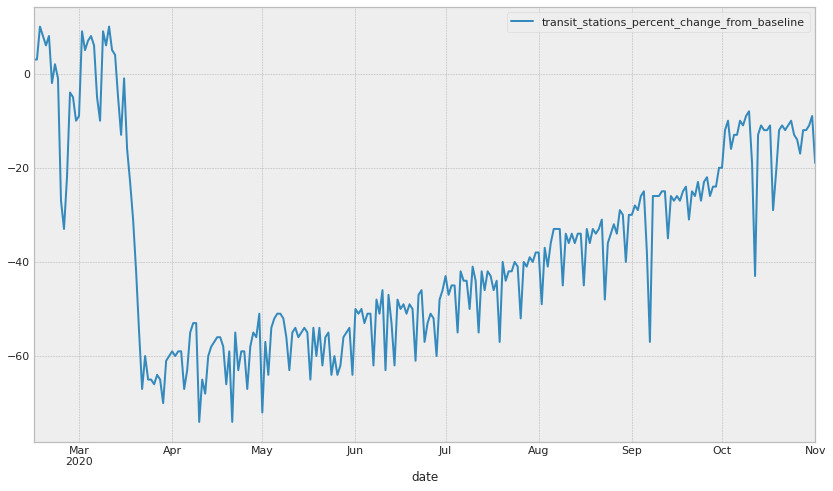

In [37]:
df_ba[['transit_stations_percent_change_from_baseline',
             'date']].groupby('date').mean().plot.line(figsize=(14,8))

In [38]:
df_ba[['transit_stations_percent_change_from_baseline',
             'workplaces_percent_change_from_baseline']].corr()

transit_stations_percent_change_from_baseline  \
transit_stations_percent_change_from_baseline                                       1.000000   
workplaces_percent_change_from_baseline                                             0.827951   

                                               workplaces_percent_change_from_baseline  
transit_stations_percent_change_from_baseline                                 0.827951  
workplaces_percent_change_from_baseline                                       1.000000

In [39]:
df_ba['transit_stations_percent_change_from_baseline'].var()

443.2584733274388

# Regressões

### Faremos regressões de São Paulo , Rio de Janeiro e Curitiba(capitais com maior disponibilidade de transporte público e correlação dos dados + menor variância do começo ao fim da pandemia)

<AxesSubplot:xlabel='workplaces_percent_change_from_baseline', ylabel='transit_stations_percent_change_from_baseline'>

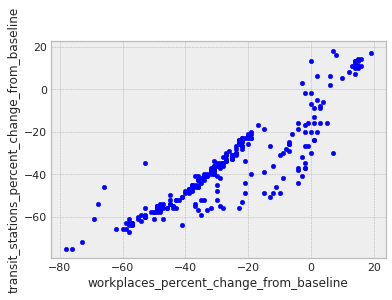

In [40]:
df_sp.plot.scatter(x = 'workplaces_percent_change_from_baseline', y = 'transit_stations_percent_change_from_baseline')

In [41]:
model = ols("transit_stations_percent_change_from_baseline ~ workplaces_percent_change_from_baseline", data=df_sp)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.789
Model:                                                       OLS   Adj. R-squared:                  0.788
Method:                                            Least Squares   F-statistic:                     970.2
Date:                                           Tue, 15 Dec 2020   Prob (F-statistic):           1.46e-89
Time:                                                   13:18:52   Log-Likelihood:                -958.61
No. Observations:                                            261   AIC:                             1921.
Df Residuals:                                                259   BIC:                             1928.
Df Model:                                                      1                                         
Covariance Type:                                       nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -12.9492      0.945    -13.701      0.000     -14.810     -11.088
workplaces_percent_change_from_baseline     0.8805      0.028     31.148      0.000       0.825       0.936
==============================================================================
Omnibus:                       20.792   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.935
Skew:                          -0.579   Prob(JB):                     1.42e-06
Kurtosis:                       4.066   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='workplaces_percent_change_from_baseline', ylabel='transit_stations_percent_change_from_baseline'>

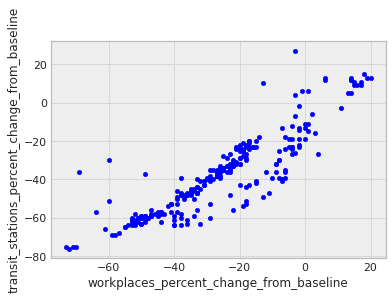

In [42]:
df_rio.plot.scatter(x = 'workplaces_percent_change_from_baseline', y = 'transit_stations_percent_change_from_baseline')

In [43]:
model = ols("transit_stations_percent_change_from_baseline ~ workplaces_percent_change_from_baseline", data=df_rio)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.787
Model:                                                       OLS   Adj. R-squared:                  0.786
Method:                                            Least Squares   F-statistic:                     958.1
Date:                                           Tue, 15 Dec 2020   Prob (F-statistic):           5.22e-89
Time:                                                   13:18:53   Log-Likelihood:                -961.50
No. Observations:                                            261   AIC:                             1927.
Df Residuals:                                                259   BIC:                             1934.
Df Model:                                                      1                                         
Covariance Type:                                       nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -13.1062      0.995    -13.177      0.000     -15.065     -11.148
workplaces_percent_change_from_baseline     0.9411      0.030     30.954      0.000       0.881       1.001
==============================================================================
Omnibus:                       47.188   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.571
Skew:                           0.665   Prob(JB):                     1.86e-41
Kurtosis:                       6.934   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='workplaces_percent_change_from_baseline', ylabel='transit_stations_percent_change_from_baseline'>

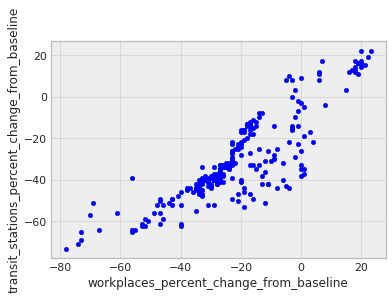

In [44]:
df_parana.plot.scatter(x = 'workplaces_percent_change_from_baseline', y = 'transit_stations_percent_change_from_baseline')

In [45]:
model = ols("transit_stations_percent_change_from_baseline ~ workplaces_percent_change_from_baseline", data=df_parana)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     transit_stations_percent_change_from_baseline   R-squared:                       0.739
Model:                                                       OLS   Adj. R-squared:                  0.738
Method:                                            Least Squares   F-statistic:                     732.9
Date:                                           Tue, 15 Dec 2020   Prob (F-statistic):           1.74e-77
Time:                                                   13:18:54   Log-Likelihood:                -979.76
No. Observations:                                            261   AIC:                             1964.
Df Residuals:                                                259   BIC:                             1971.
Df Model:                                                      1                                         
Covariance Type:                                       nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 -10.9870      0.971    -11.314      0.000     -12.899      -9.075
workplaces_percent_change_from_baseline     0.9168      0.034     27.072      0.000       0.850       0.983
==============================================================================
Omnibus:                       11.361   Durbin-Watson:                   0.969
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.881
Skew:                          -0.450   Prob(JB):                      0.00263
Kurtosis:                       3.533   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 432x288 with 0 Axes>

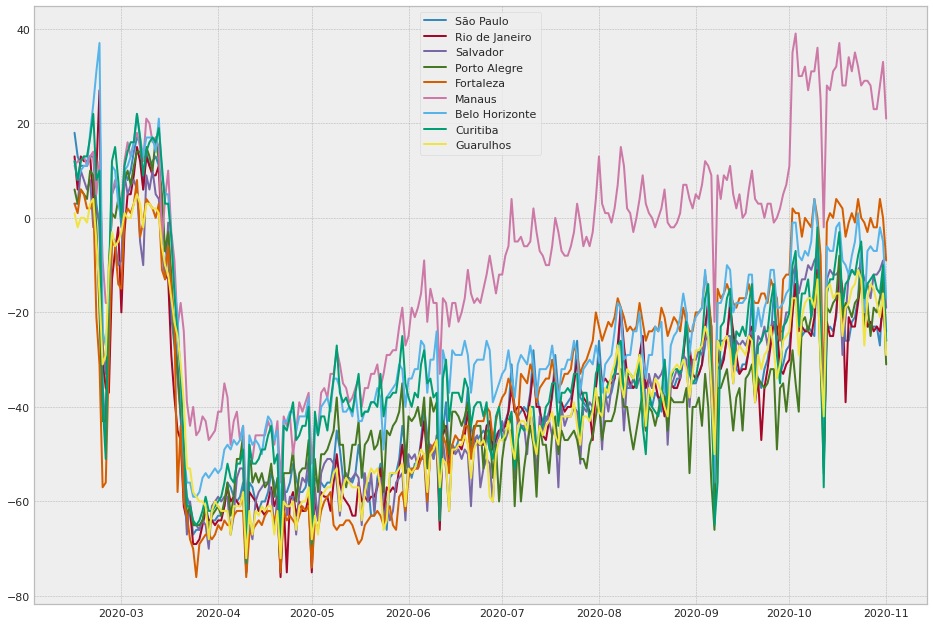

In [99]:
fig = plt.figure()
plt.figure(figsize=(16,11))

for frame in [df_sp, df_rio, df_ba, df_rs, df_ceara, df_ama, df_mg, df_parana, df_gua]:
    line, = plt.plot(frame['date'], frame['transit_stations_percent_change_from_baseline'])
    
plt.legend(['São Paulo','Rio de Janeiro', 'Salvador','Porto Alegre', 'Fortaleza' , 'Manaus', 'Belo Horizonte', 'Curitiba', 'Guarulhos'])
plt.savefig(f'figuras/{fig}.png')

<Figure size 432x288 with 0 Axes>

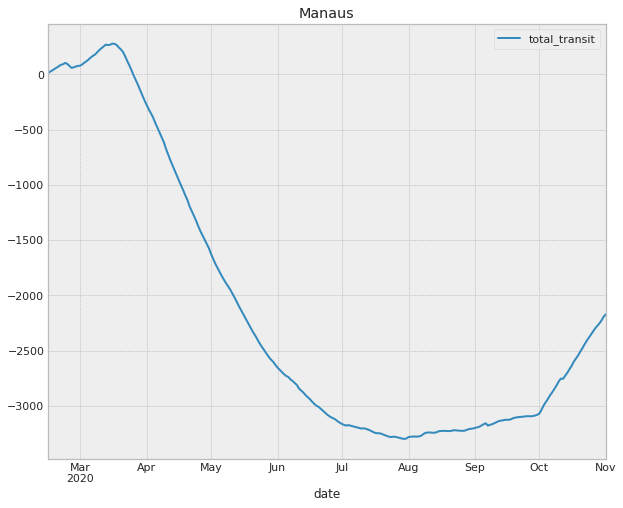

In [87]:
df_ama['total_transit'] = df_ama['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_ama.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Manaus')
plt.savefig(f'figuras/{ama}.png')

<Figure size 432x288 with 0 Axes>

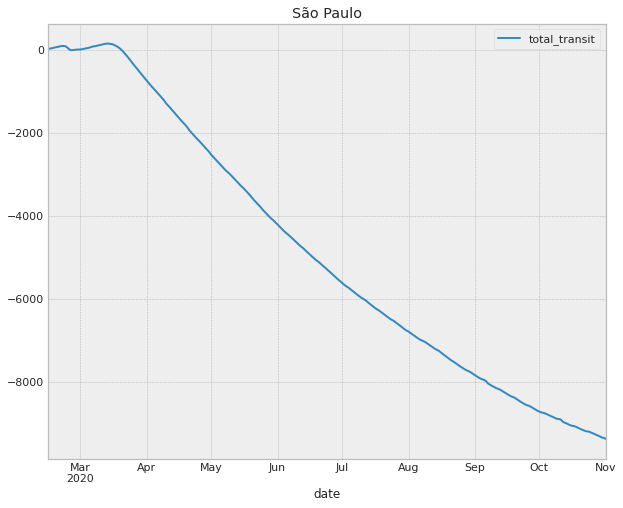

In [88]:
df_sp['total_transit'] = df_sp['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_sp.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'São Paulo')
plt.savefig(f'figuras/{ama}.png')

<Figure size 432x288 with 0 Axes>

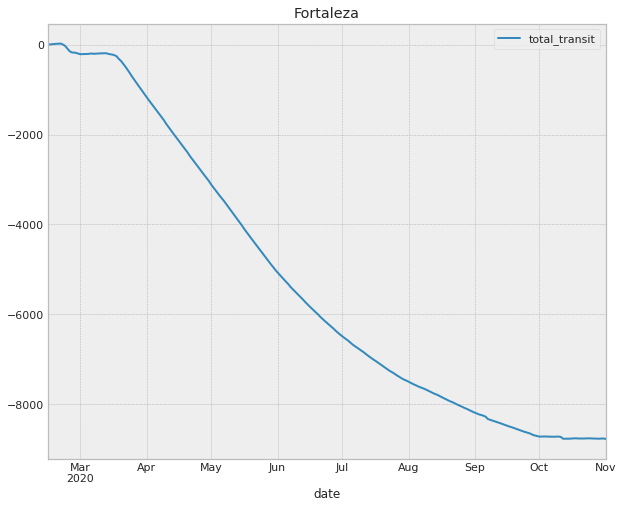

In [89]:
df_ceara['total_transit'] = df_ceara['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_ceara.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Fortaleza')
plt.savefig(f'figuras/{ama}.png')

<Figure size 432x288 with 0 Axes>

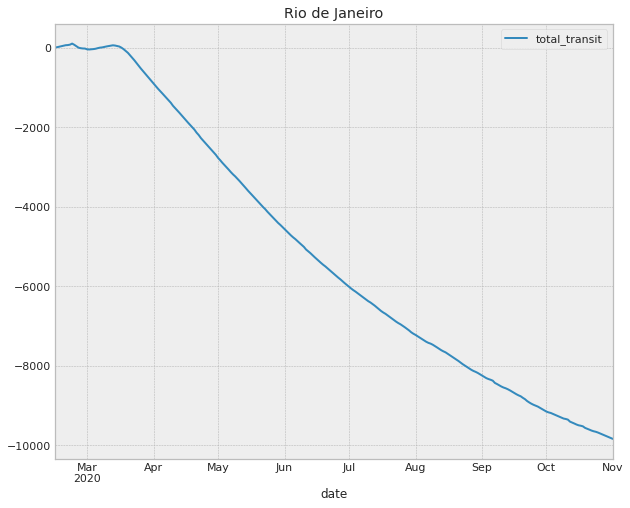

In [90]:
df_rio['total_transit'] = df_rio['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_rio.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Rio de Janeiro')
plt.savefig(f'figuras/{ama}.png')

<Figure size 432x288 with 0 Axes>

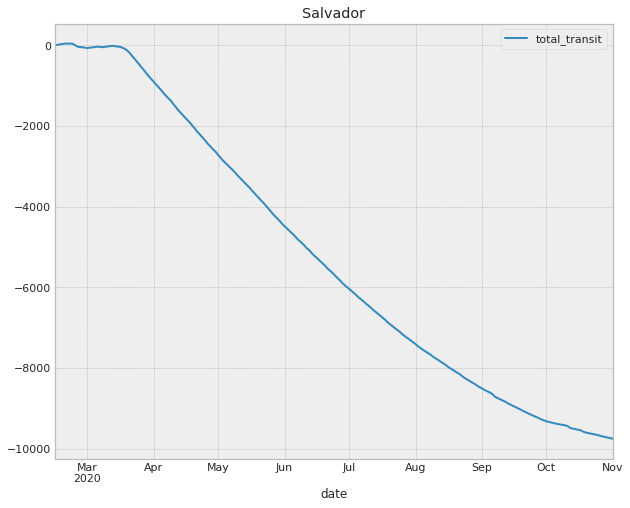

In [91]:
df_ba['total_transit'] = df_ba['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_ba.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Salvador')
plt.savefig(f'figuras/{ama}.png')

<Figure size 432x288 with 0 Axes>

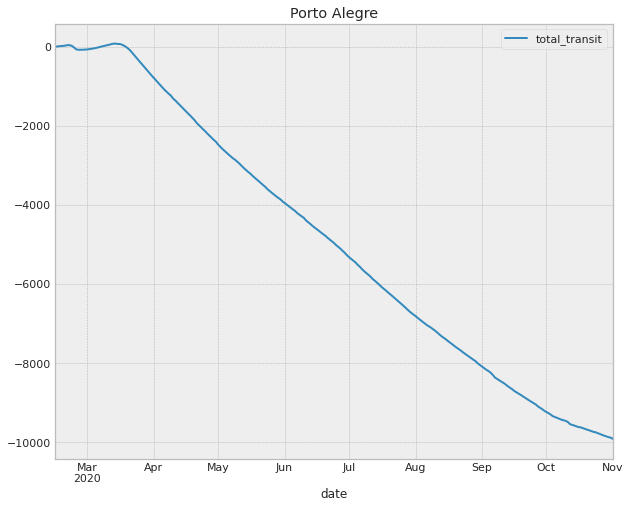

In [92]:
df_rs['total_transit'] = df_rs['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_rs.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Porto Alegre')
plt.savefig(f'figuras/{ama}.png')

<Figure size 432x288 with 0 Axes>

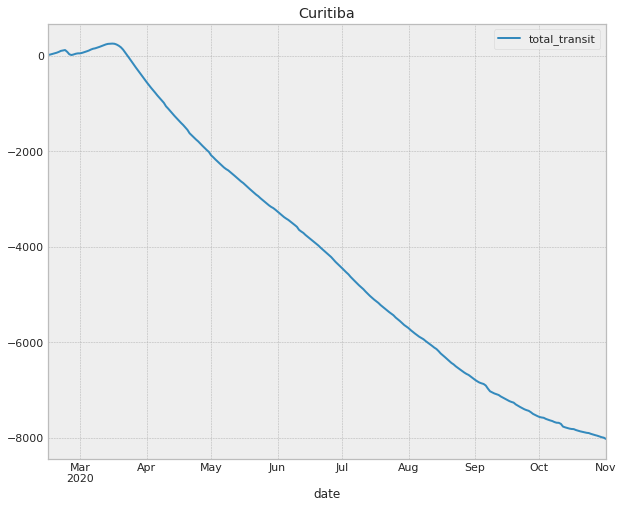

In [93]:
df_parana['total_transit'] = df_parana['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_parana.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Curitiba')
plt.savefig(f'figuras/{ama}.png')

<Figure size 432x288 with 0 Axes>

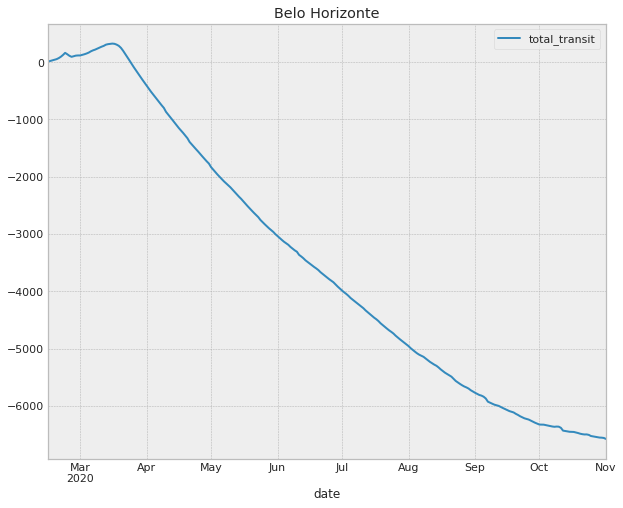

In [94]:
df_mg['total_transit'] = df_mg['transit_stations_percent_change_from_baseline'].cumsum()

ama = plt.figure()
df_mg.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Belo Horizonte')
plt.savefig(f'figuras/{ama}.png')

<AxesSubplot:title={'center':'Guarulhos'}, xlabel='date'>

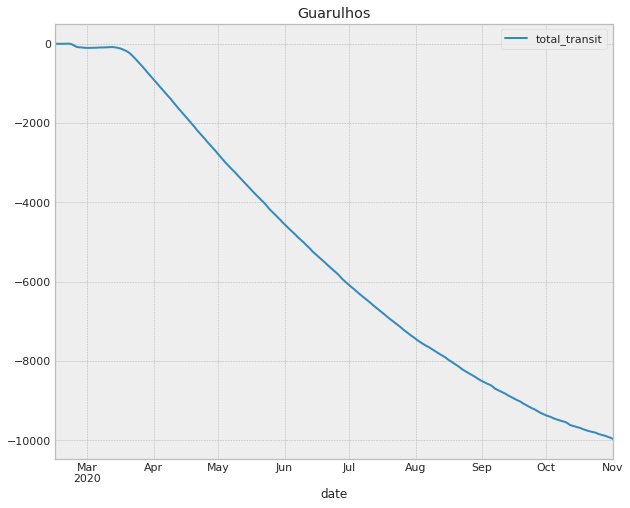

In [98]:
df_gua = df_mobility.copy()
df_gua = df_gua[df_gua["sub_region_1"] == "State of São Paulo"]
df_gua = df_gua[df_gua["sub_region_2"] == "Guarulhos"]
df_gua['total_transit'] = df_gua['transit_stations_percent_change_from_baseline'].cumsum()

df_gua.plot(x = 'date', y = 'total_transit', figsize=(10, 8), title = 'Guarulhos')

## Podemos dizer que o aumento da mobilidade em locais de trabalho nas grandes capitais possui grande influência da utilização de transportes públicos. 
## Isso ocorre mesmo em cidades como São Paulo e Rio de Janeiro, que possuem alta quantidade de veículos. Logo podemos estudar o fato de que majoritariamente pessoas que transitam por locais de trabalho utilizam transporte público para trabalhar e essas tornam-se mais suscetíveis ao vírus.